In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

NameError: name 'plt' is not defined

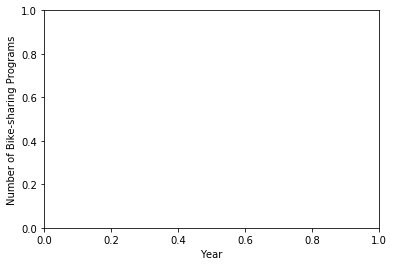

In [2]:
import numpy as np
import pylab as  plt
ax = pl.gca()
data=np.loadtxt('bike-sharing-world.txt')
datafrb = np.loadtxt('bike-sharing-world2.txt')

dm=data[:,0]
w=data[:,1]
#s=data[:,2]


year=datafrb[:,0]
ap=datafrb[:,1]
eu=datafrb[:,2]
la=datafrb[:,3]
me=datafrb[:,4]
am=datafrb[:,5]

#pl.figure(1)
#pl.subplot(211)
#pl.xlabel('DM($cm^{-3}$ pc)')
#pl.ylabel('S(Jy)')
#plot1 = plt.bar(dm,w,marker='.',s=2.0,color='r')
#plot1 = plt.bar(dm,w,color='g')
#plot2 = pl.scatter(dmfrb,sfrb,marker='+',color='g')
#pl.legend([plot1, plot2], ['simulated', 'Observed'])


#pl.subplot(212)
pl.xlabel('Year')
pl.ylabel('Number of Bike-sharing Programs')
plot1 = plt.plot(year,ap,color='r',label="Asia and Pacific")
plot2 = plt.plot(year,eu,color='b',label="Europe")
plot3 = plt.plot(year,la,color='g',label="Latin America")
plot4 = plt.plot(year,me,color='m',label="Middle East")
plot5 = plt.plot(year,am,color='y',label="North America")
#plt.legend([plot1, plot2, plot3, plot4, plot5], ['Asia and Pacific', 'Europe', 'Latin America', 'Middle East','North America'])

plt.legend()
plt.savefig('bike-world.eps')

In [2]:
# Import and read the data file.
data = pd.read_csv("hour.csv")

In [3]:
data.columns
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
#Display first 5 rows of the file
display(data[:5])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Display a description of the dataset
display(data['casual'].describe())
display(data['registered'].describe())

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64

In [6]:
#Convert normalized temperatures to actual temperatures
atemp_new = (data['atemp'] * (66.0)) - 16.0
temp_new = (data['atemp'] * (47.0)) - 8.0


Text(0,0.5,'Total Number of Bike Rentals')

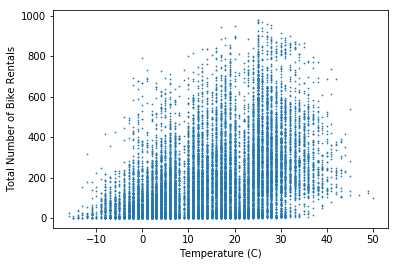

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(atemp_new, data['cnt'], s=0.5)
plt.xlabel('Temperature (C)')
plt.ylabel('Total Number of Bike Rentals')


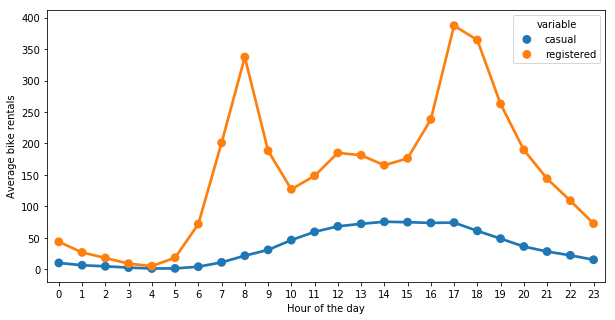

In [8]:
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
hourdata = pd.melt(data[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
houravg = pd.DataFrame(hourdata.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houravg["hr"], y=houravg["value"],hue=houravg["variable"],hue_order=["casual","registered"], data=houravg)
ax.set(xlabel='Hour of the day', ylabel='Average bike rentals')
plt.savefig("hrusage.png")

/home/akshaya/py3_kernel/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


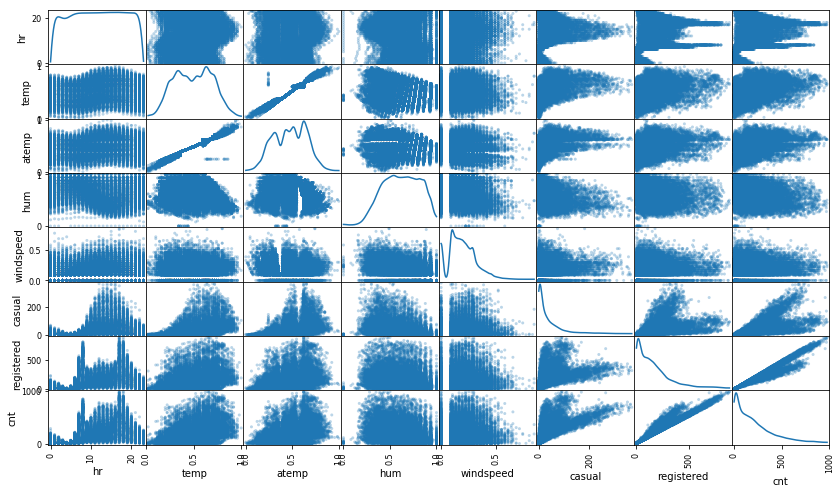

In [9]:
#Plot scatter matrix for all features
params = ["hr","temp", "atemp","hum","windspeed","casual","registered","cnt"]
pd.scatter_matrix(data[params], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig("scatter.png")

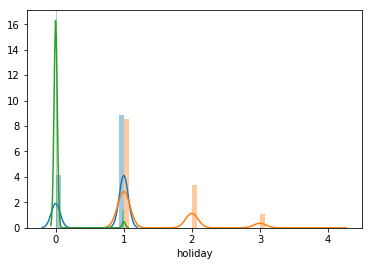

In [9]:
sns.distplot(data["workingday"])
sns.distplot(data["weathersit"])
sns.distplot(data["holiday"])

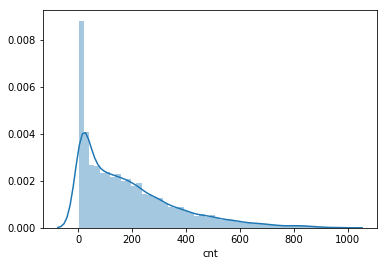

In [10]:
sns.distplot(data["cnt"])

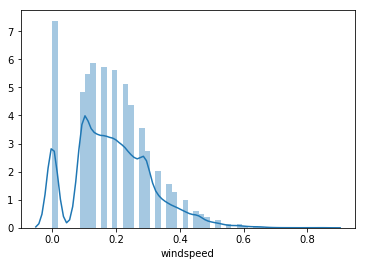

In [11]:
sns.distplot(data["windspeed"])

In [17]:
# Log-transform the skewed features
skewed = ['cnt']
features_log_transformed = pd.DataFrame(data)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))


In [7]:
#Display first 5 rows of the file
display(data[:5])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


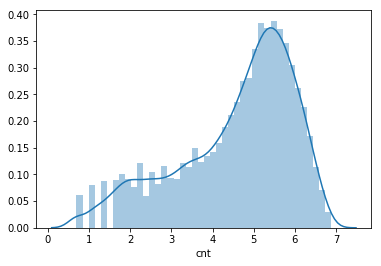

In [19]:
sns.distplot(data["cnt"])

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

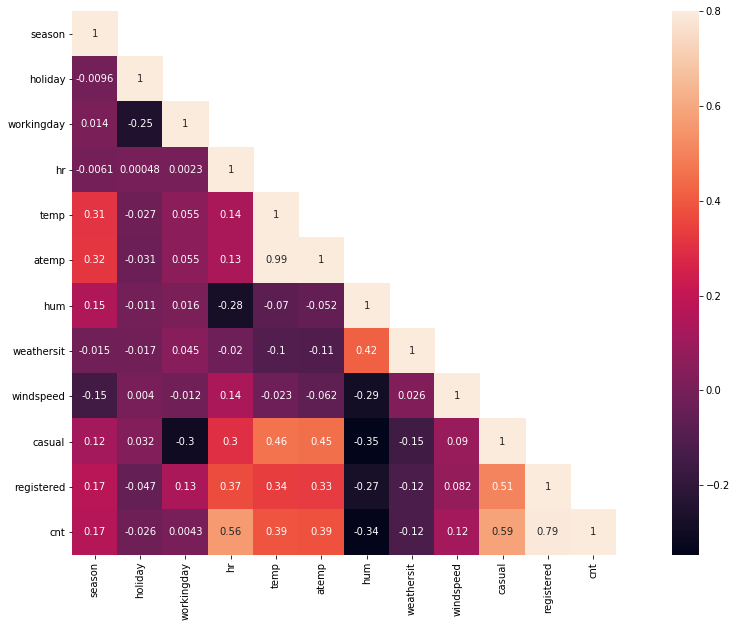

In [21]:
#Correlation matrix
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
corr = data[["season","holiday","workingday","hr","temp", "atemp","hum","weathersit", "windspeed","casual","registered","cnt"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)
plt.savefig("correlation.png")

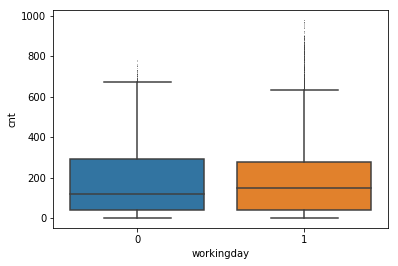

In [13]:
sns.boxplot(data['workingday'], data['cnt'],fliersize=0.1)
#plt.savefig('boxplot.eps')

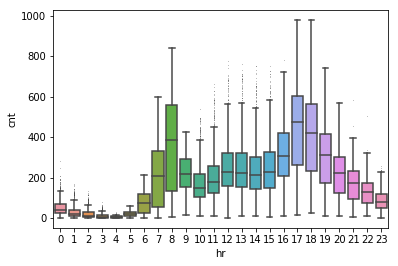

In [14]:
sns.boxplot(data['hr'], data['cnt'],fliersize=0.1)

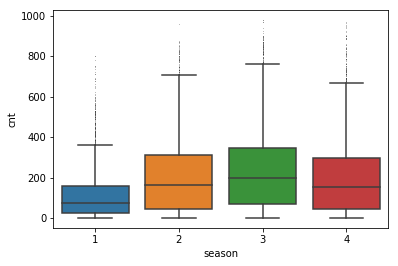

In [15]:
sns.boxplot(data['season'], data['cnt'],fliersize=0.1)

In [9]:
data_noOutliers = data[np.abs(data["cnt"]-data["cnt"].mean())<=(3*data["cnt"].std())] 

In [10]:
print ("Shape Of The Before Ouliers: ",data.shape)
print ("Shape Of The After Ouliers: ",data_noOutliers.shape)

Shape Of The Before Ouliers:  (17379, 17)
Shape Of The After Ouliers:  (17135, 17)


In [11]:
display(data_noOutliers[:5])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
#Split the data into training and testing set.
data_noOutliers["dt"] = data_noOutliers.dteday.apply(lambda x : x.split()[0].split("-")[2])
data_noOutliers['date'] = data_noOutliers['dt'].astype(str).astype(int)
test_data = data_noOutliers[(data_noOutliers['date'] >= 20)]
train_data = data_noOutliers[(data_noOutliers['date'] < 19)]


/home/akshaya/py3_kernel/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/akshaya/py3_kernel/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Split the data into training and testing set.
data["dt"] = data.dteday.apply(lambda x : x.split()[0].split("-")[2])
data['date'] = data['dt'].astype(str).astype(int)
test_data = data[(data['date'] >= 20)]
train_data = data[(data['date'] < 19)]


In [13]:
X_train = train_data.drop(["instant","dteday","yr","atemp","casual","registered","cnt","dt","date"],axis=1)
y_train = train_data['cnt'].values
labels_2 = data['casual'].values
labels_3 = data['registered'].values
X_test = test_data.drop(["instant","dteday","yr","atemp","casual","registered","cnt","dt","date"],axis=1)
y_test = test_data['cnt'].values

In [14]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10174 samples.
Testing set has 6397 samples.


In [15]:
display(X_test[:5])

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
431,1,1,0,0,4,1,1,0.26,0.56,0.3881
432,1,1,1,0,4,1,1,0.26,0.56,0.0000
433,1,1,2,0,4,1,1,0.26,0.56,0.0000
434,1,1,3,0,4,1,1,0.26,0.56,0.1642
435,1,1,4,0,4,1,1,0.26,0.56,0.1642


In [16]:
#Define Root Mean Squared logarithmic error.
def rmsle(a, a_,convertExp=True):
    if convertExp:
        a = np.exp(a),
        a_ = np.exp(a_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in a]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in a_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [17]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
from time import time
results = {}
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
LRmodel = LinearRegression()

# Train the model
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
LRmodel.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
# Make predictions
preds = LRmodel.predict(X_train)
preds_test = LRmodel.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Linear Regression:  0.9955620092787406
RMSLE Value For Linear Regression:  1.0305427070917932
{'pred_time': 0.004286527633666992, 'train_time': 0.1003122329711914}


In [18]:
from sklearn.ensemble import RandomForestRegressor
from time import time
results = {}
RFmodel = RandomForestRegressor()
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
RFmodel.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = RFmodel.predict(X_train)
preds_test = RFmodel.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Random Forest:  0.1599151230362716
RMSLE Value For Random Forest:  0.4643505820455951
{'pred_time': 0.02941441535949707, 'train_time': 0.29392576217651367}


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time
results = {}
gbm = GradientBoostingRegressor(); ### Test 0.41
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
gbm.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = gbm.predict(X_train)
preds_test = gbm.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Gradient Boost:  0.41395150845612977
RMSLE Value For Gradient Boost:  0.49085833503545456
{'pred_time': 0.016144990921020508, 'train_time': 0.3728036880493164}


In [20]:
from sklearn import svm
from time import time
results = {}
SVmodel = svm.SVR()
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
SVmodel.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = SVmodel.predict(X_train)
preds_test = SVmodel.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSLE Value For SVM: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For SVM: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For SVM:  0.35269592752130274
RMSLE Value For SVM:  0.4891345101207531
{'pred_time': 5.041848659515381, 'train_time': 6.894964933395386}


In [21]:
from sklearn.tree import DecisionTreeRegressor
from time import time
from sklearn.metrics import r2_score
results = {}
DTmodel = DecisionTreeRegressor()
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)

start = time() # Get start time
DTmodel.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = DTmodel.predict(X_train)
preds_test = DTmodel.predict(X_test)
end = time() # Get end time
    
    # TODO: Calculate the total prediction time
results['pred_time'] = end - start
            
print ("RMSLE Value For Decision Tree: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Decision Tree: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)
print ("R2_score= ",r2_score(logtrain_labels, preds))

RMSLE Value For Decision Tree:  0.009192233445920798
RMSLE Value For Decision Tree:  0.5926320104325978
{'pred_time': 0.005522489547729492, 'train_time': 0.06580638885498047}
R2_score=  0.9999415303442789


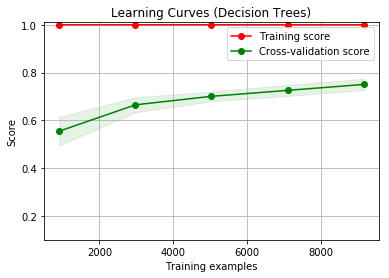

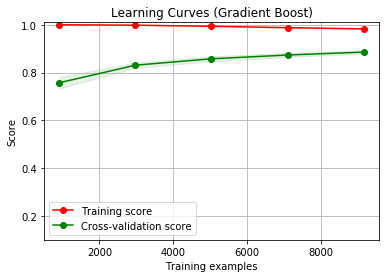

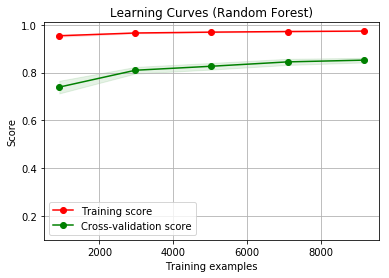

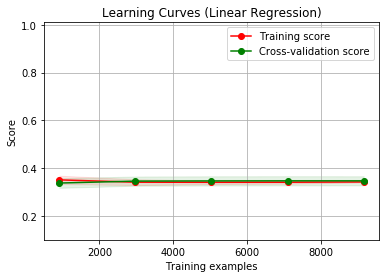

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X, y = X_train,y_train


title = "Learning Curves (Decision Trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)
estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig("lcurves2.png")

title = "Learning Curves (Gradient Boost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)
estimator = GradientBoostingRegressor(learning_rate=0.2, max_depth=8)
plot_learning_curve(estimator, title, X, y, (0.1, 1.01), cv=cv, n_jobs=4)
#plt.savefig("lcurves4.png")

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig("lcurves3.png")

title = "Learning Curves (Linear Regression)"
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig("lcurves1.png")

In [40]:
from sklearn.model_selection import validation_curve
validation_curve(estimator, title, X, y, cv=cv, "alpha",n_jobs=4)

SyntaxError: positional argument follows keyword argument (<ipython-input-40-70a28dc4f267>, line 2)

In [44]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = GradientBoostingRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': range(1,10), 'n_estimators':[100,200,500,1000,1500]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_
    #return grid.best_score_
    #print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
#print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))

In [45]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'

print ("Parameter 'Learning_rate' is {} for the optimal model.".format(reg.get_params()['learning_rate']))
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print ("Parameter 'n_estimators' is {} for the optimal model.".format(reg.get_params()['n_estimators']))

Parameter 'Learning_rate' is 0.1 for the optimal model.
Parameter 'max_depth' is 5 for the optimal model.
Parameter 'n_estimators' is 1500 for the optimal model.


In [42]:
results = {}
gbm = GradientBoostingRegressor(learning_rate=0.2, max_depth=8); ### Test 0.41
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
gbm.fit(X_train,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = gbm.predict(X_train)
preds_test = gbm.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Gradient Boost:  0.13561908698349193
RMSLE Value For Gradient Boost:  0.4704318858673879
{'pred_time': 0.10500860214233398, 'train_time': 2.5204031467437744}


In [87]:
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [95]:
regressor = RandomForestRegressor()

## Compute PCA
We can now compute a PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction.

In [35]:
# Import supplementary visualizations code visuals.py
import visuals2 as vs

In [43]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    

def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("customers.csv")
	except:
	    print("Dataset could not be loaded. Is the file missing?")       
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

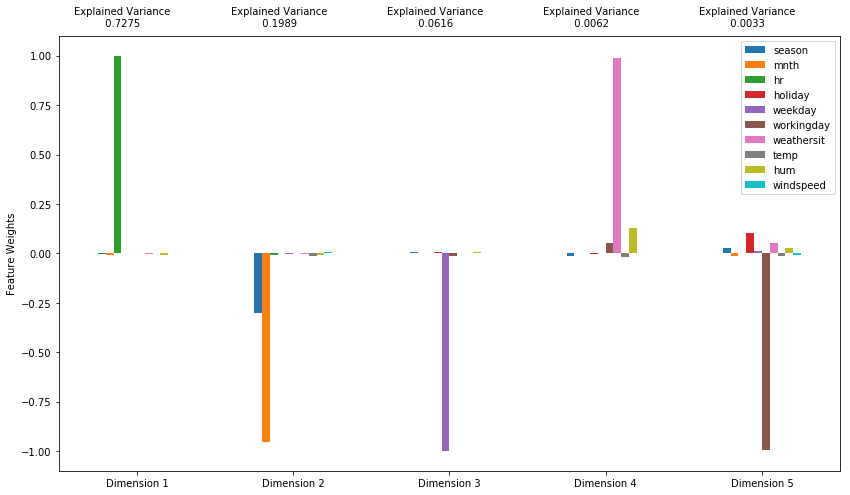

In [44]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(X_test)

# Generate PCA results plot
pca_res = pca_results(X_train, pca)

In [45]:
print(pca.explained_variance_ratio_)

[0.72753167 0.19887412 0.06159132 0.00618779 0.00333913]


In [54]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=5)
pca.fit(X_train)

# TODO: Transform the good data using the PCA fit above
reduced_data =pca.transform(X_train)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(X_test)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2','Dimension 3', 'Dimension 4','Dimension 5'])

In [49]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-11.4425,5.7799
1,-10.4435,5.7714
2,-9.4436,5.7648
3,-8.4432,5.7590
4,-7.4433,5.7524
5,-6.4436,5.7459
6,-5.4437,5.7396
7,-4.4434,5.7335
8,-3.4433,5.7272
9,-2.4447,5.7190


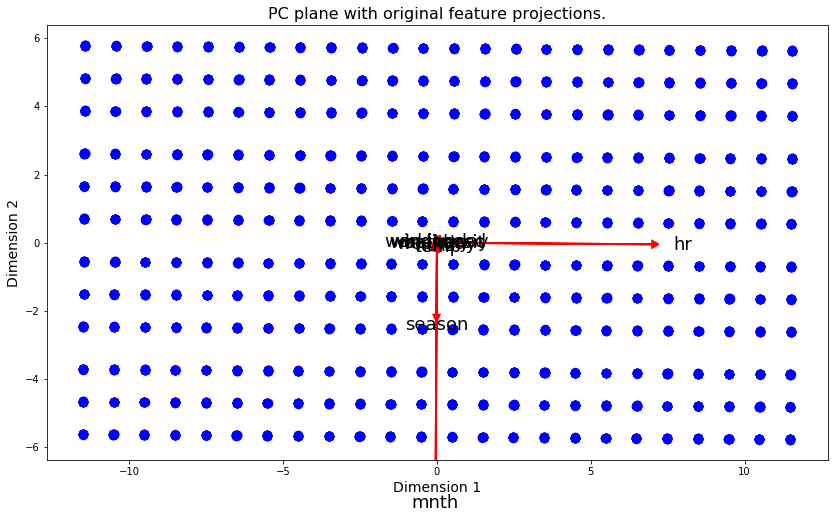

In [50]:
biplot(X_train, reduced_data, pca)

In [55]:
results = {}
RFmodel = RandomForestRegressor()
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
RFmodel.fit(reduced_data,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = RFmodel.predict(reduced_data)
preds_test = RFmodel.predict(pca_samples)
end = time() # Get end time
results['pred_time'] = end - start
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Random Forest:  0.1812271981235247
RMSLE Value For Random Forest:  0.5437091135211294
{'pred_time': 0.026839733123779297, 'train_time': 0.4652714729309082}


In [57]:

from sklearn.ensemble import AdaBoostRegressor
from time import time
results = {}
adb = AdaBoostRegressor(); ### Test 0.41
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
adb.fit(reduced_data,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = adb.predict(reduced_data)
preds_test = adb.predict(pca_samples)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSLE Value For Ada Boost: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Ada Boost: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Ada Boost:  0.6731271163545417
RMSLE Value For Ada Boost:  0.7248152636149375
{'pred_time': 0.044554948806762695, 'train_time': 0.6137447357177734}


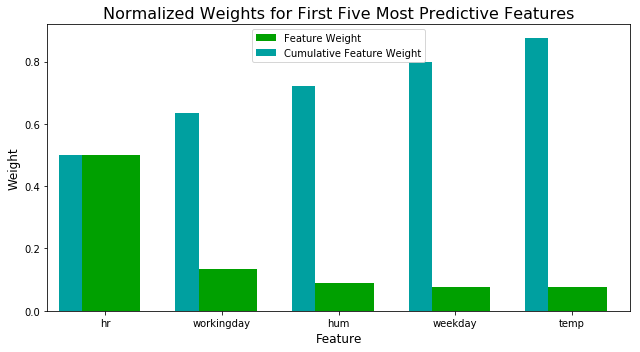

In [20]:
import visuals as vs
importances = gbm.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [21]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]


results = {}
#RFmodel = RandomForestRegressor(n_estimators=300, max_depth=20)
#adb = AdaBoostRegressor(); ### Test 0.41
gbm = GradientBoostingRegressor(); ### Test 0.41
logtrain_labels = np.log1p(y_train)
logtest_labels = np.log1p(y_test)
start = time() # Get start time
gbm.fit(X_train_reduced,logtrain_labels)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
preds = gbm.predict(X_train_reduced)
preds_test = gbm.predict(X_test_reduced)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtrain_labels),np.exp(preds),False))
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(logtest_labels),np.exp(preds_test),False))
print(results)

RMSLE Value For Ada Boost:  0.4554713071713649
RMSLE Value For Ada Boost:  0.49063489087196854
{'pred_time': 0.018352985382080078, 'train_time': 0.2508561611175537}


In [68]:
X_train_reduced.shape

(10174, 5)

In [69]:
X_train.shape

(10174, 10)